In [24]:
import pandas as pd
import numpy as np
papers = pd.read_csv('/content/research_paper.csv')
papers.head()

,Year,Title-name,Paper-text
0,1988,GUEST EDITORIAL:GENETIC ALGORITHMS AND MACHIN...,M\nachine learning and search\ntechniques play...
1,2019,LOCAL RELATION NETWORKS FOR IMAGE RECOGNITION,The convolution layer has been the dominant fe...
2,2020,AN IMAGE ISWORTH16X16 WORDS:TRANSFORMERS FOR I...,While the Transformer architecture has become ...
3,2021,HANDLING BACKGROUND NOISE IN NEURAL SPEECH GEN...,Recent advances in neural-network based genera...
4,2021,GENERAL PERCEPTION WITH ITERATIVE ATTENTION,Biological systems understand the world by si-...


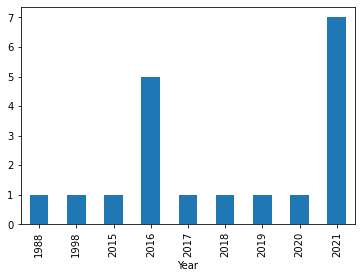

In [19]:
# Group the papers by year
groups = papers.groupby(by='Year')
# Determine the size of each group
counts = groups.size()
# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar');

In [20]:
# Load the regular expression library
import re
# Print the titles of the first rows 
print(papers['Title-name'].head())
# Remove punctuation
papers['title_processed'] = papers['Title-name'].map(lambda x: re.sub('[,\.!?]', ':', x))
# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())
# Print the processed titles of the first rows 
print(papers['title_processed'].head())
papers.head()

0    GUEST  EDITORIAL:GENETIC ALGORITHMS AND MACHIN...
1        LOCAL RELATION NETWORKS FOR IMAGE RECOGNITION
2    AN IMAGE ISWORTH16X16 WORDS:TRANSFORMERS FOR I...
3    HANDLING BACKGROUND NOISE IN NEURAL SPEECH GEN...
4          GENERAL PERCEPTION WITH ITERATIVE ATTENTION
Name: Title-name, dtype: object
0    guest  editorial:genetic algorithms and machin...
1        local relation networks for image recognition
2    an image isworth16x16 words:transformers for i...
3    handling background noise in neural speech gen...
4          general perception with iterative attention
Name: title_processed, dtype: object


,Year,Title-name,Paper-text,title_processed
0,1988,GUEST EDITORIAL:GENETIC ALGORITHMS AND MACHIN...,M\nachine learning and search\ntechniques play...,guest editorial:genetic algorithms and machin...
1,2019,LOCAL RELATION NETWORKS FOR IMAGE RECOGNITION,The convolution layer has been the dominant fe...,local relation networks for image recognition
2,2020,AN IMAGE ISWORTH16X16 WORDS:TRANSFORMERS FOR I...,While the Transformer architecture has become ...,an image isworth16x16 words:transformers for i...
3,2021,HANDLING BACKGROUND NOISE IN NEURAL SPEECH GEN...,Recent advances in neural-network based genera...,handling background noise in neural speech gen...
4,2021,GENERAL PERCEPTION WITH ITERATIVE ATTENTION,Biological systems understand the world by si-...,general perception with iterative attention


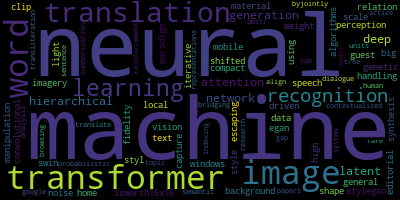

In [21]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

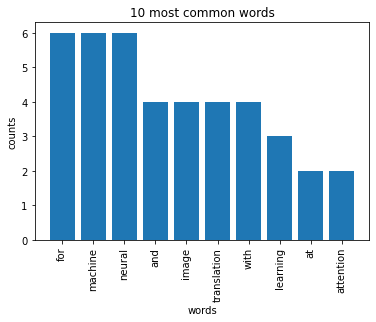

In [22]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [23]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
neural for image mobile convolutional network weight light high styl

Topic #1:
machine with neural of word translation words units sub rare

Topic #2:
neural generation noise in speech handling background machine with for

Topic #3:
machine neural with for transliteration learning and latent deep attention

Topic #4:
and byjointly align to translate data escaping compact paradigm big

Topic #5:
for deep networks relation local reinforcement dialogue perception iterative general

Topic #6:
machine translation the between gap bridging google human system research

Topic #7:
attention latent abstr summarization active model sentence indexing probabilistic semantic

Topic #8:
transformer hierarchical windows vision using shifted swin representations contextualized deep

Topic #9:
image at machine transformers recognition learning scale an isworth16x16 algorithms
